- https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook

survival :	생존 여부	0 = 아니요, 1 = 예<br>
pclass : 티켓 등급	1 = 1st, 2 = 2nd, 3 = 3rd<br>
sex : 성	<br>
Age	: 당시 나이	<br>
sibsp :	타이타닉에 승선한 형제자매/배우자 수	<br>
parch :	타이타닉에 탑승한 부모/자녀 수	<br>
ticket : 티켓 번호	<br>
fare : 요금	<br>
cabin :	객실 번호	<br>
embarked : 승선항	C = Cherbourg, Q = Queenstown, S = Southampton<br>

# Part1 : Exploratory Data Analysis(EDA)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/seotaeyeong/Desktop/kaggle/titanic/data/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

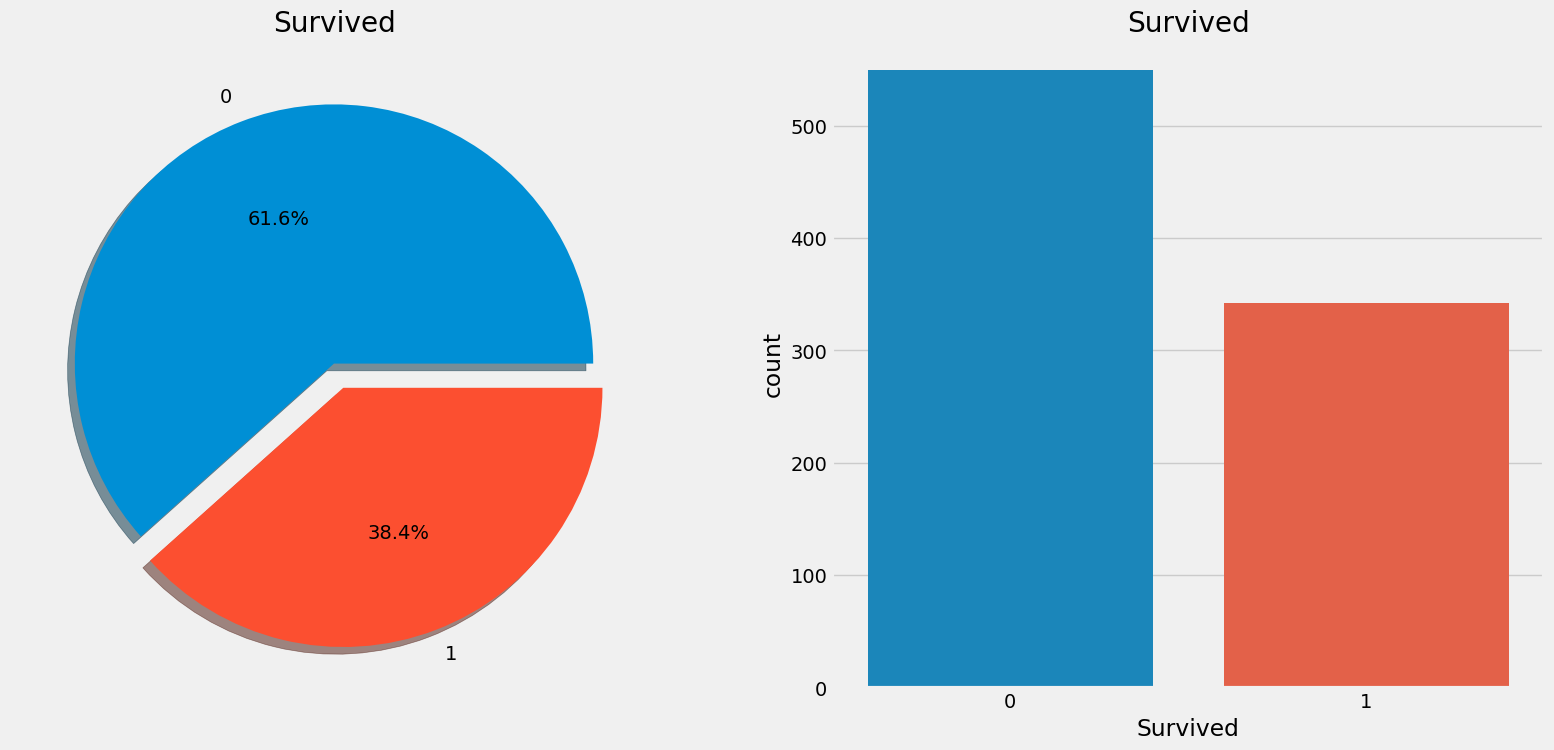

In [7]:
f, ax = plt.subplots(1,2,figsize=(18,8)) # 1행 2열로
data['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(data, x='Survived', ax = ax[1])
ax[1].set_title('Survived')
plt.show()


### Categorical Feature(범주형 변수)
- Categorical Feature는 두개 이상의 선택지가 있는, 분류 할 수 있는 Feature를 말한다.
- like gender, embarked

### Ordinal Feature(명목형 변수)
- Ordinal Feature는 Categorical Feature와 유사하지만 상대적 순서가 있고 정렬이 가능하다는 차이점이 있다.
- like height, pclass

### Continous Feature(연속형 변수)
- Continous Feature는 특정 두 지점 사이 또는 최대 최소 지점의 값을 취할 수 있는 경우이다.
- like age

# Sex -> Categorical Feature

In [8]:
# 성별 별 Survived 확인
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

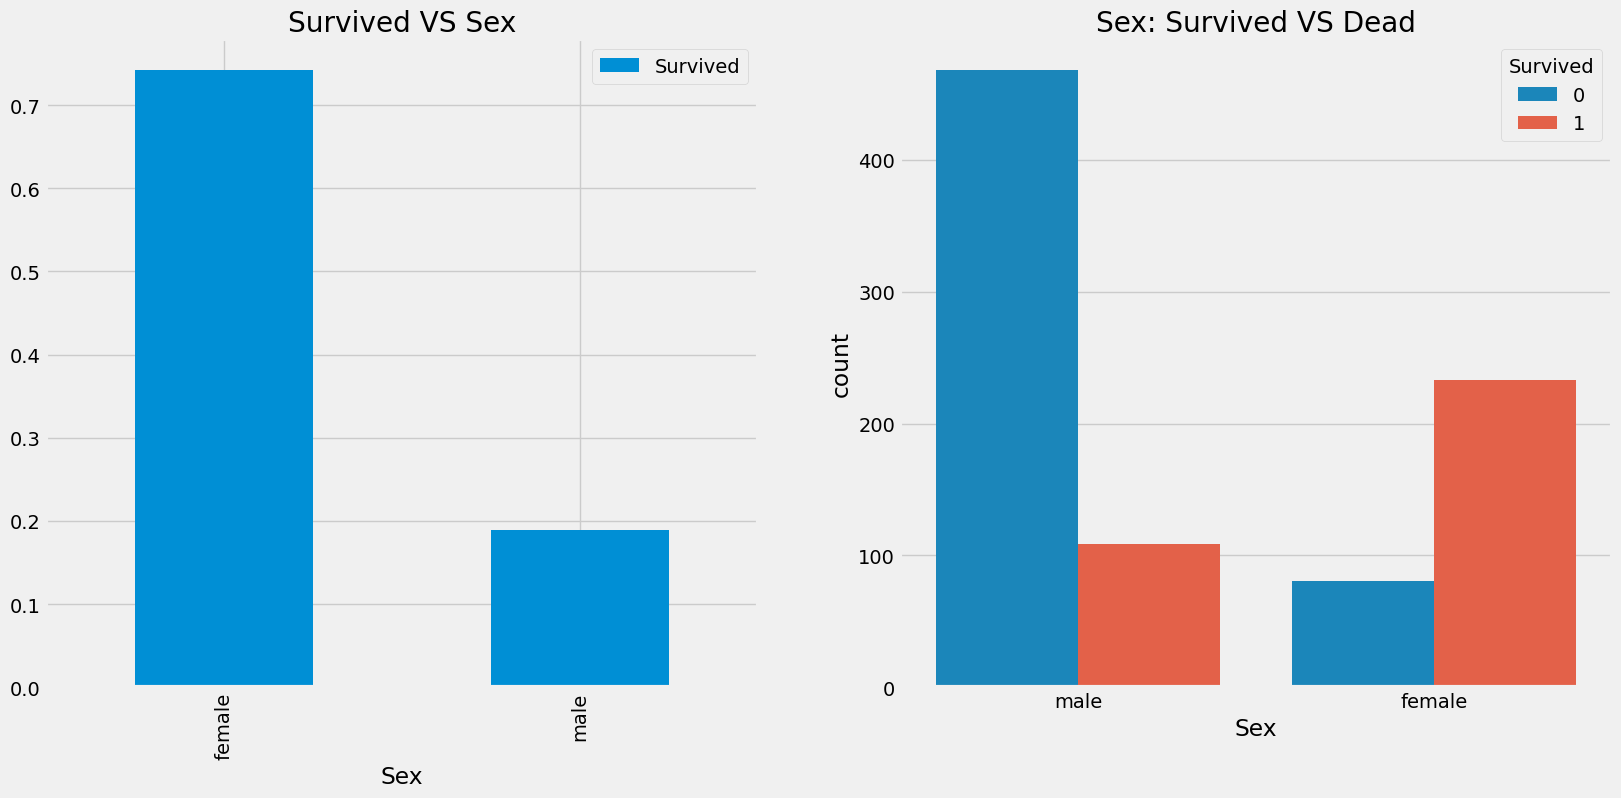

In [9]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived VS Sex')
sns.countplot(x = 'Sex', hue = 'Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived VS Dead')
plt.show()

# PClass -> Ordinal Feature

In [10]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


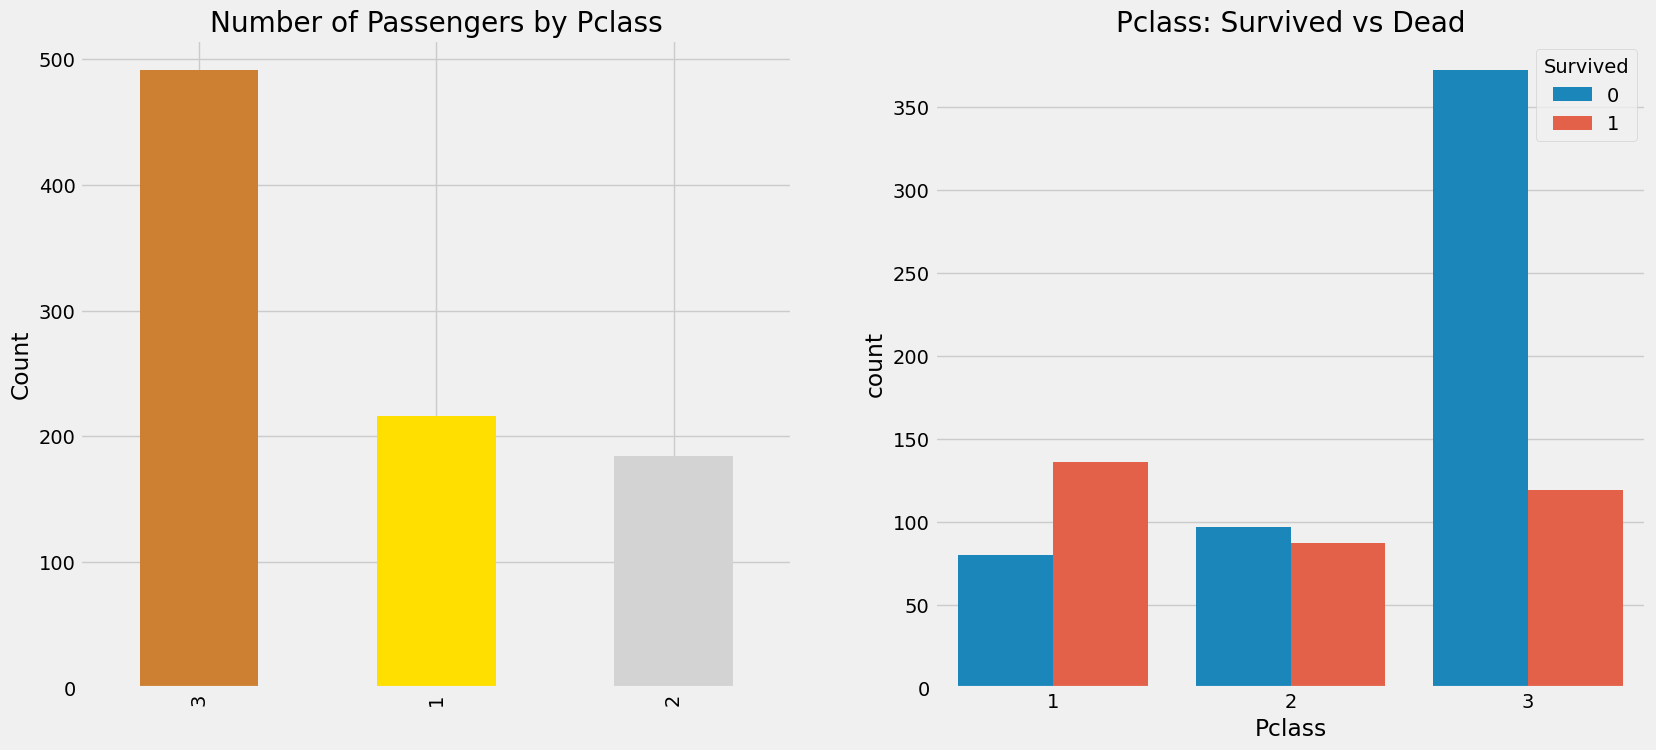

In [11]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

In [12]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

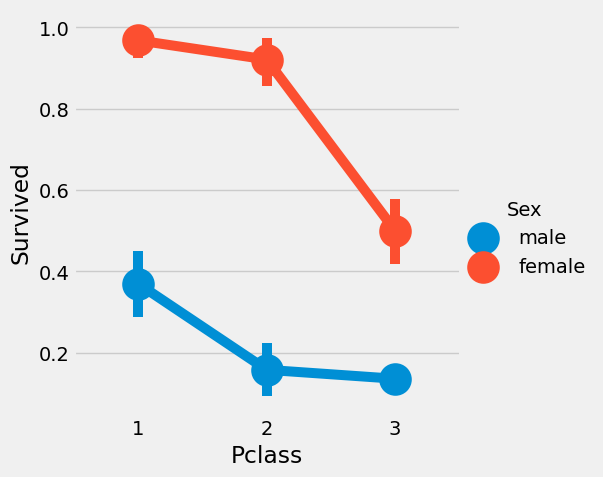

In [13]:
# factorplot이 seaborn에서 삭제됨
# seaborn 패치 노트?(22년 9월)
# 같은 기능을 catplot()을 사용하면 된다고 함
#sns.factorplot(x = 'Pclass', y ='Survived', hue='Sex', data=data)
sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="point", data=data)
plt.show()

# Age -> Continous Feature

In [14]:
print('Oldest Passenger was of :', data['Age'].max(), 'Years')
print('Youngest Passenger was of :', data['Age'].min(), 'Years')
print('Average Age on the ship :', data['Age'].mean(), 'Years')

Oldest Passenger was of : 80.0 Years
Youngest Passenger was of : 0.42 Years
Average Age on the ship : 29.69911764705882 Years


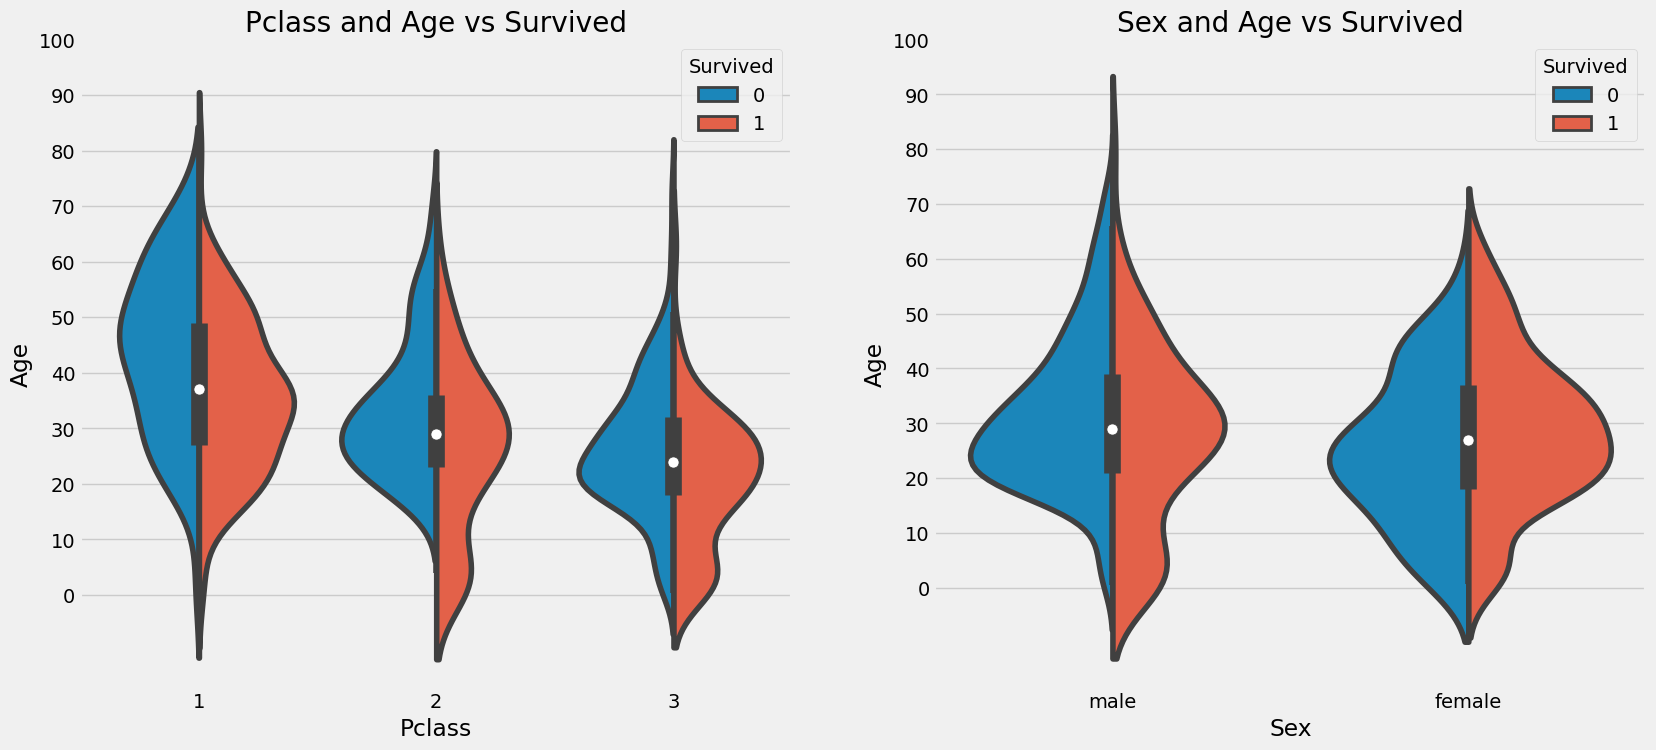

In [15]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x='Sex', y = 'Age', hue='Survived', data = data, split=True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- pclass가 높아질수록(클래스가 낮아질수록) 어린이 수가 높아지는데 어린이의 생존율을 클래스와 상관없이 높다.

In [16]:
# age에 약 177개의 null 값이 존재하기에 분석이 힘듬
# 근데 평균 값을 넣을라고 하니깐 차이가 너무 커서 이름의 Mrs, Mr를 사용한다고 함
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [17]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [18]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [19]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [20]:
# filling Nan ages
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == "Mrs"), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == "Master"), 'Age'] = 35
data.loc[(data.Age.isnull()) & (data.Initial == "Miss"), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == "Other"), 'Age'] = 46

In [21]:
data.Age.isnull().any()

False

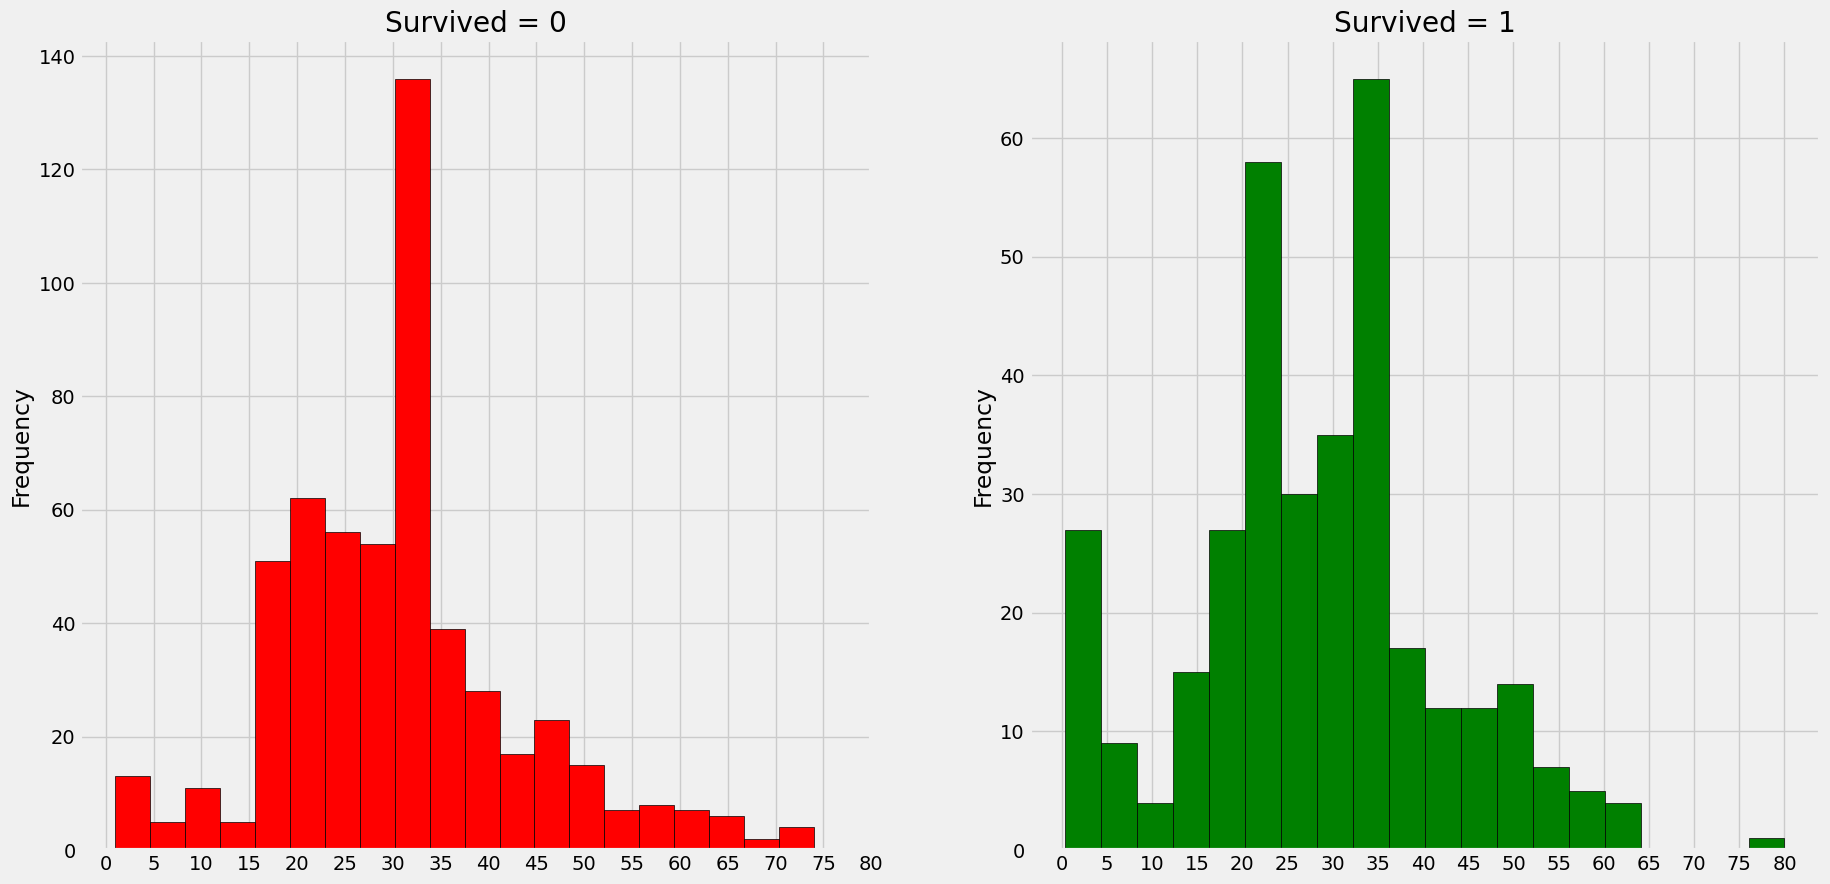

In [22]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0],bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived'] == 1].Age.plot.hist(ax = ax[1], color = 'green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

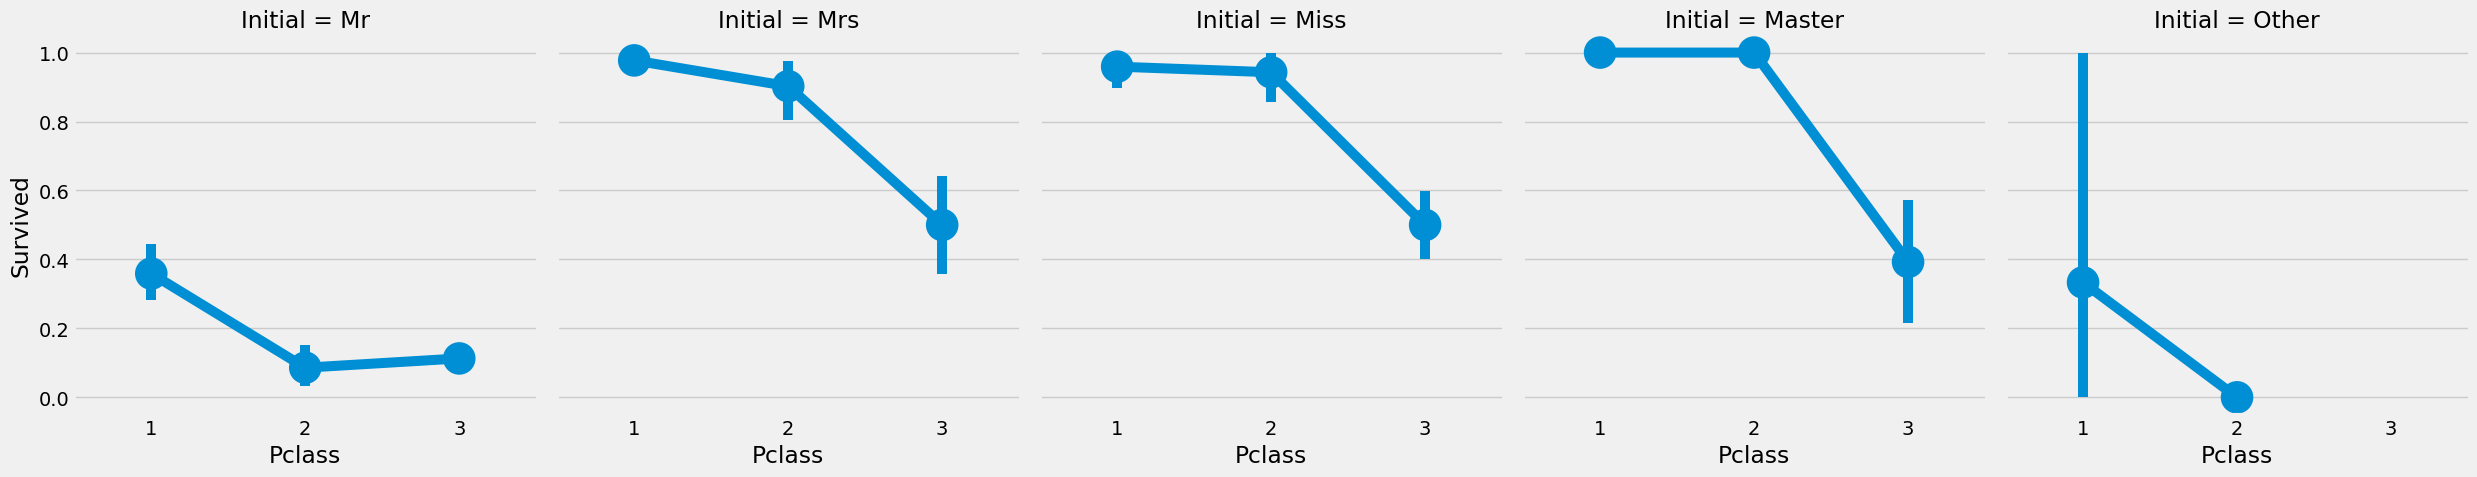

In [23]:
sns.catplot(x="Pclass", y = "Survived", col="Initial", kind="point", data=data)
plt.show()

# Embarked -> Categorical Value

In [24]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

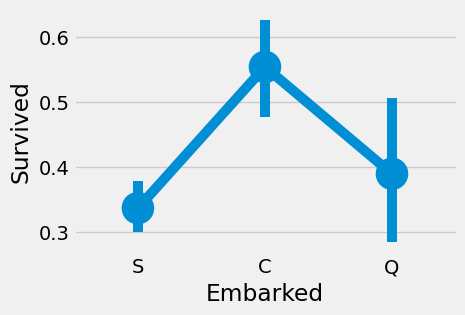

In [25]:
sns.catplot(x = "Embarked", y = "Survived", kind="point" ,data = data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

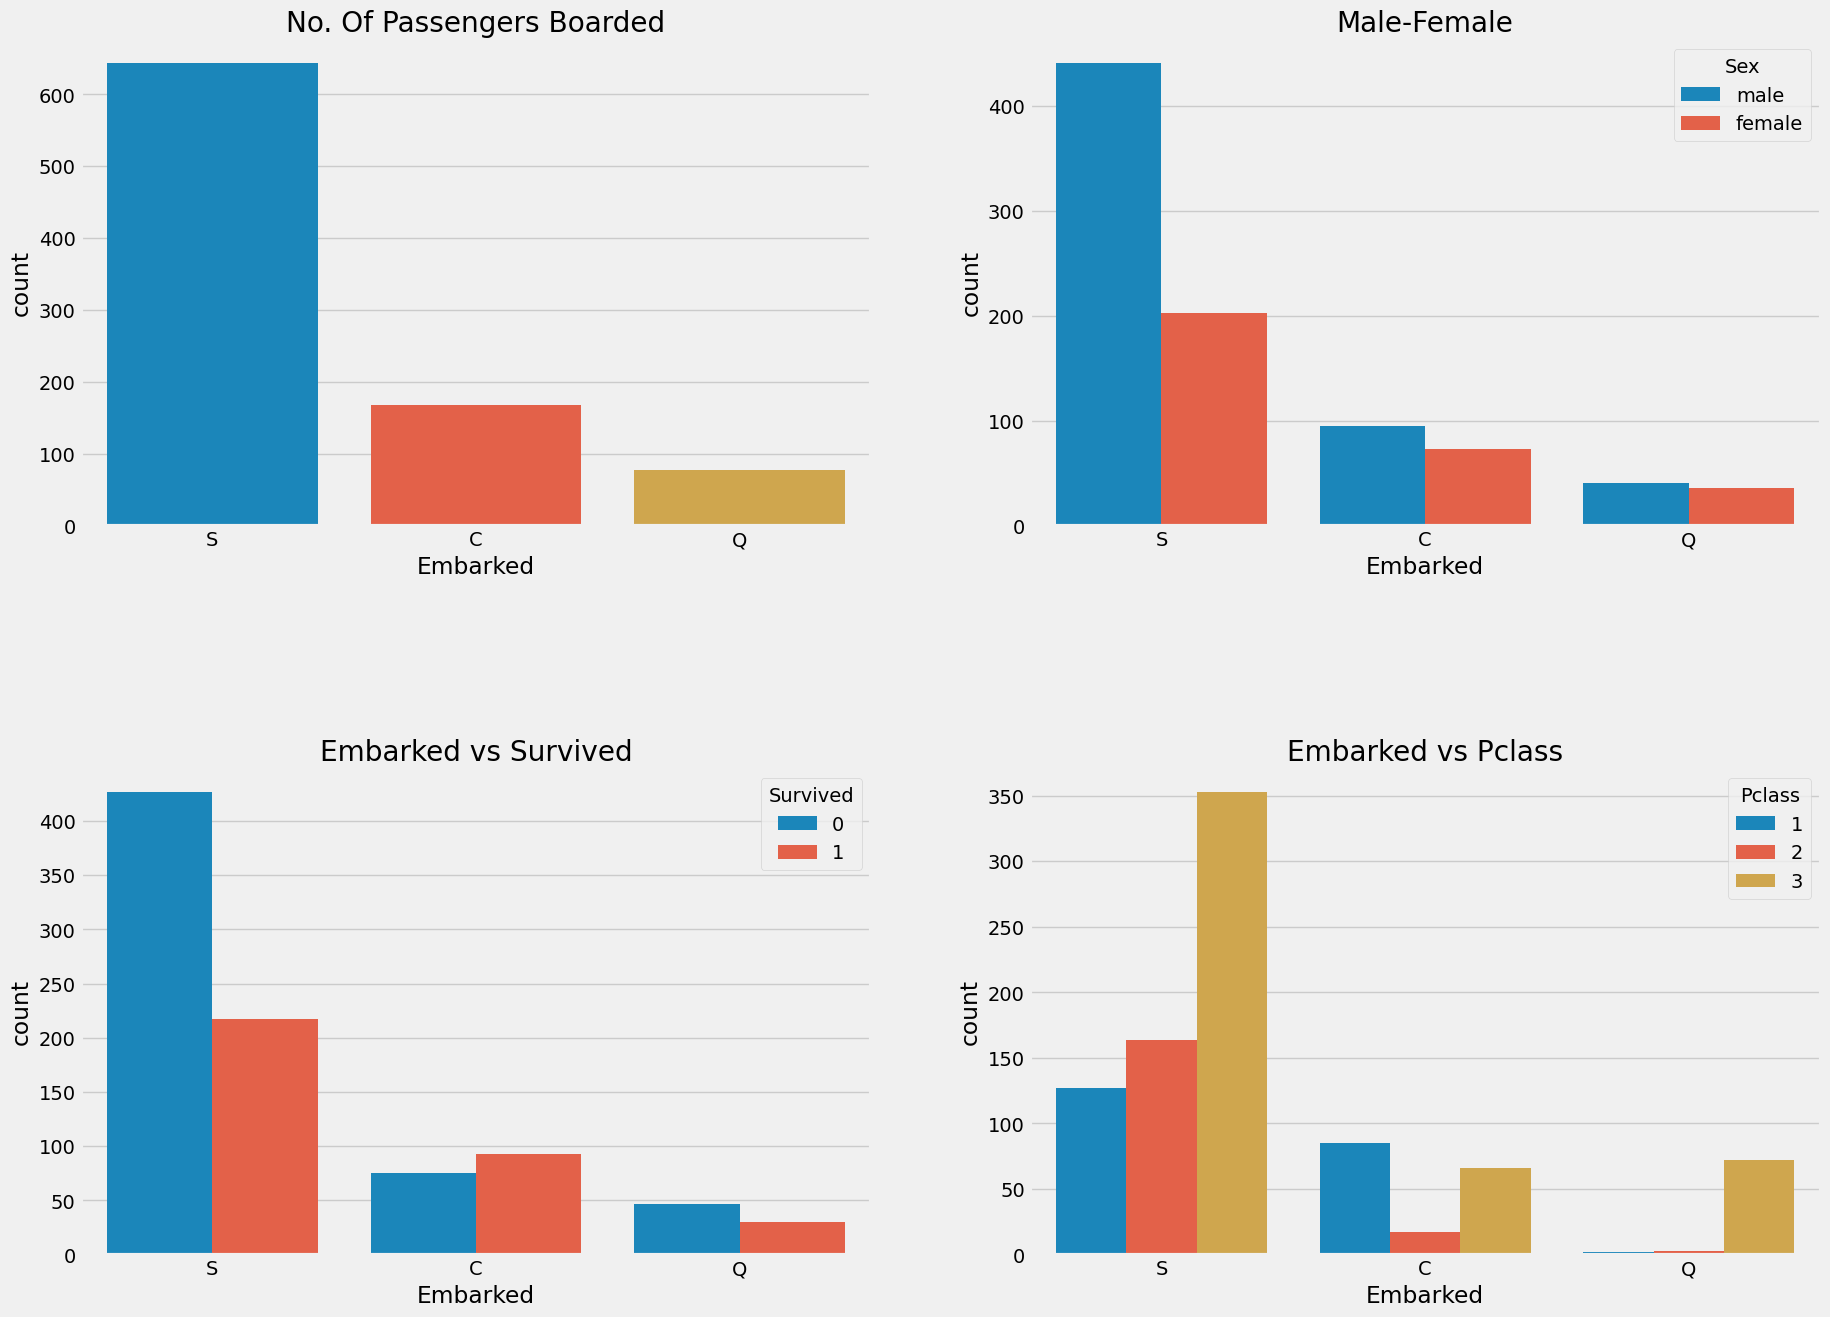

In [26]:
f, ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot(x = 'Embarked', data=data, ax= ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female')

sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

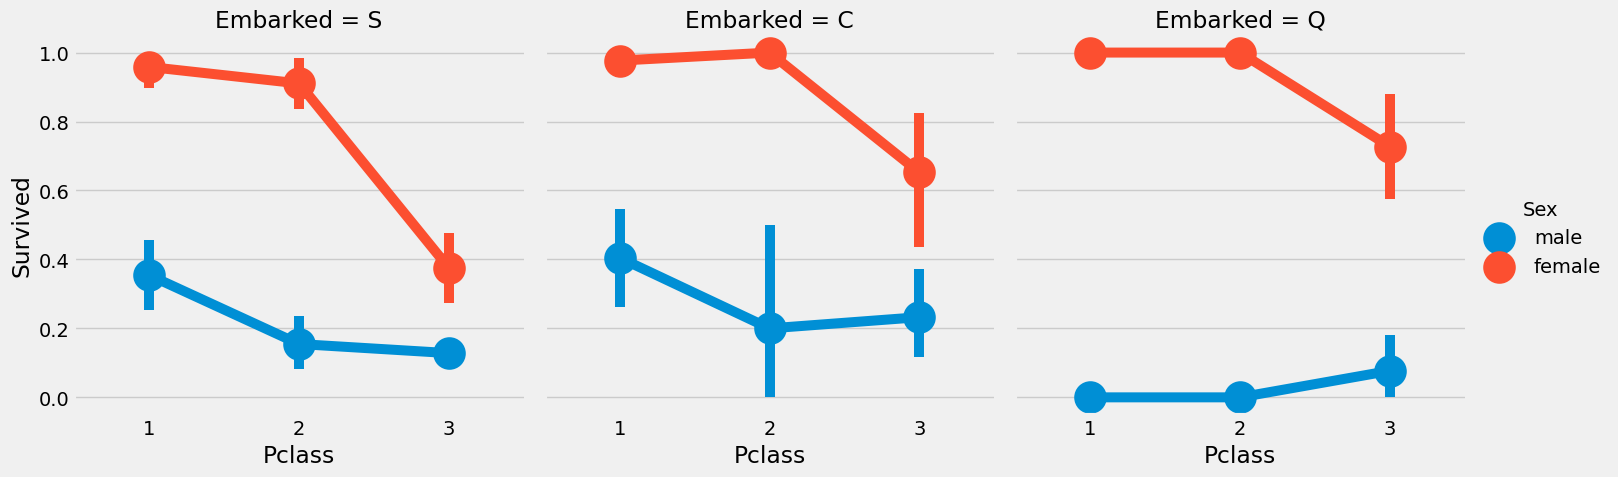

In [27]:
sns.catplot(x = "Pclass", y="Survived", hue = "Sex", col="Embarked", kind="point",data=data)
plt.show()

In [28]:
# Filling Embarked NaN
data['Embarked'].fillna('S', inplace=True) # data['Embarked']에 null 값을 s로 입력
# s로 채운 이유는 s의 수가 가장 많기 때문에 s로 채움

In [29]:
data.Embarked.isnull().any()

False

# SibSip -> Discrete Feature
- 가족과 왔는지 혼자 왔는지
- Sibsp : 형자/자매/배우자
- Parch : 부모/자녀
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife

In [30]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


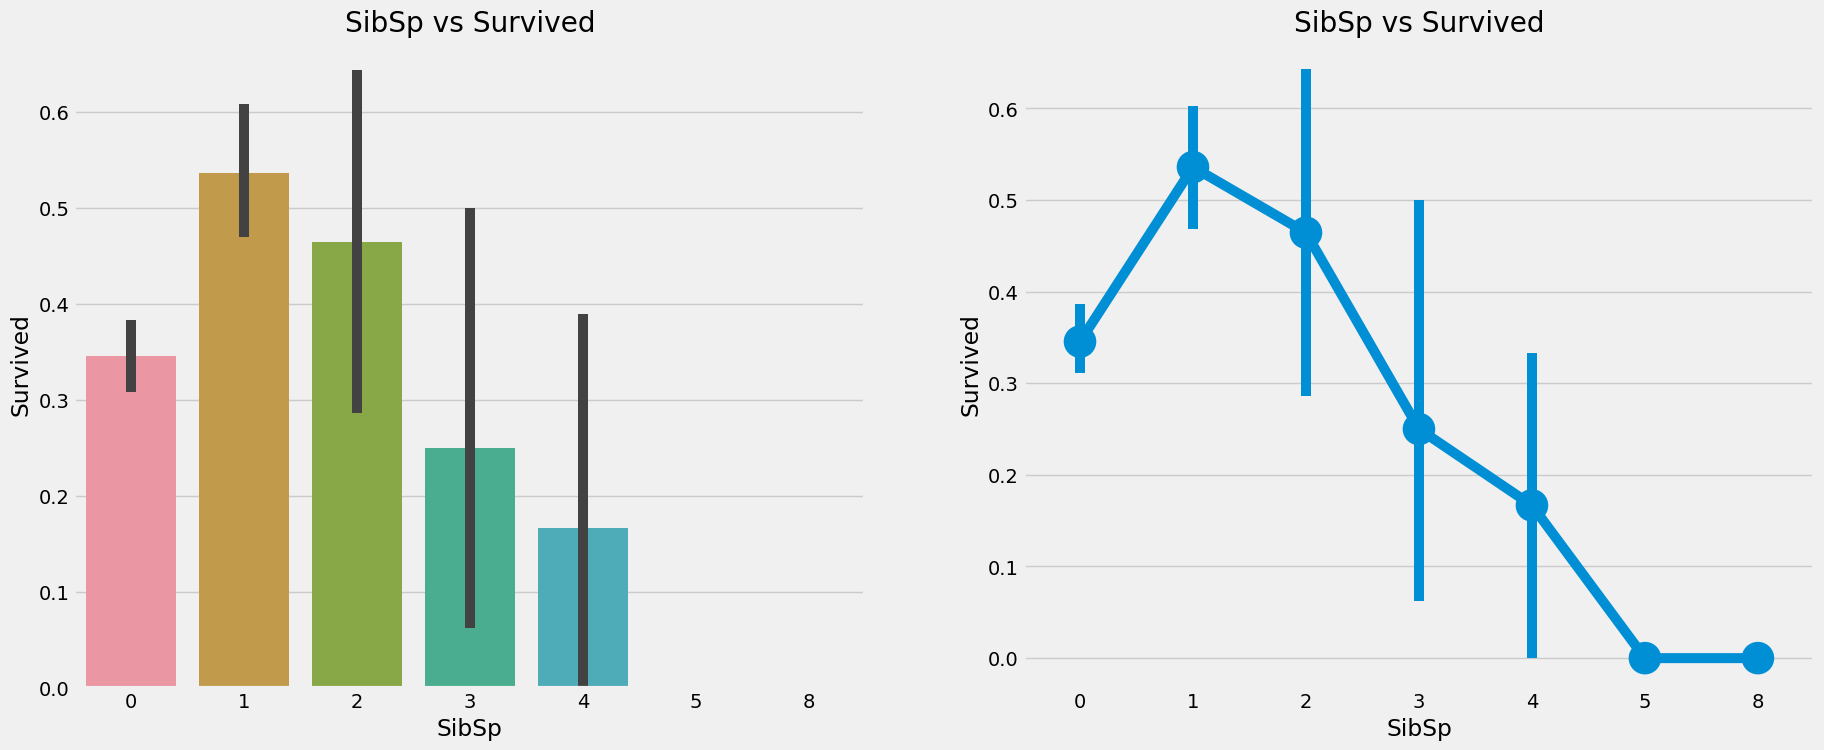

In [31]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x="SibSp", y="Survived", data=data, ax=ax[0])
ax[0].set_title("SibSp vs Survived")
sns.pointplot(x="SibSp", y="Survived", data=data, ax=ax[1])
ax[1].set_title("SibSp vs Survived")
plt.close(2)

plt.show()

In [32]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


# Parch
- 부모/자녀

In [33]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

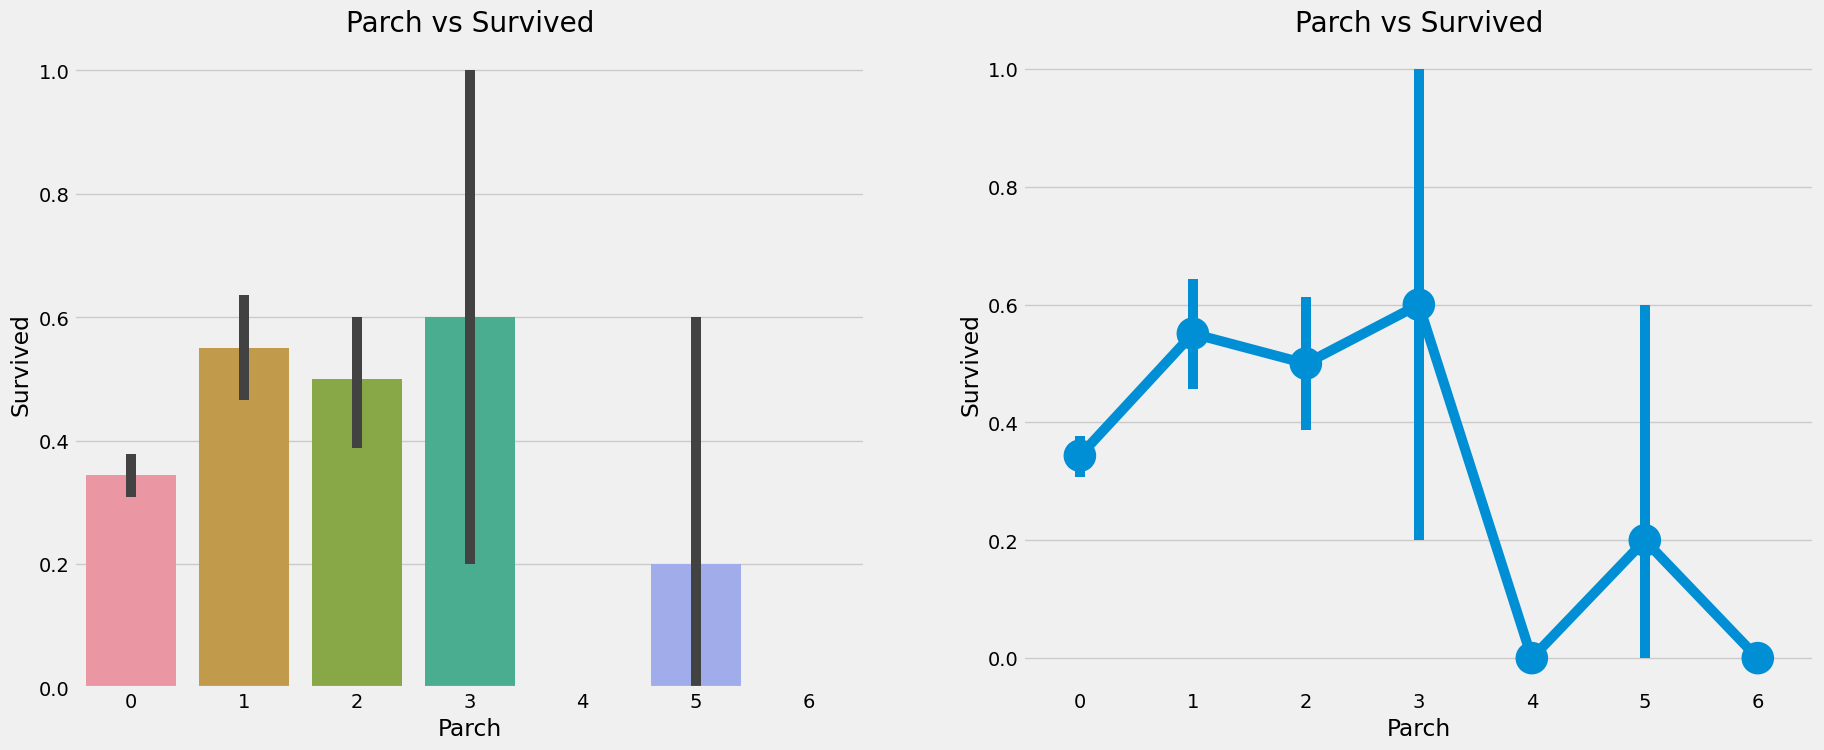

In [34]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x="Parch", y="Survived", data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.pointplot(x="Parch", y="Survived", data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show

# Fare(요금) -> Continous Feature

In [35]:
print('Highest Fare was :', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was : 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


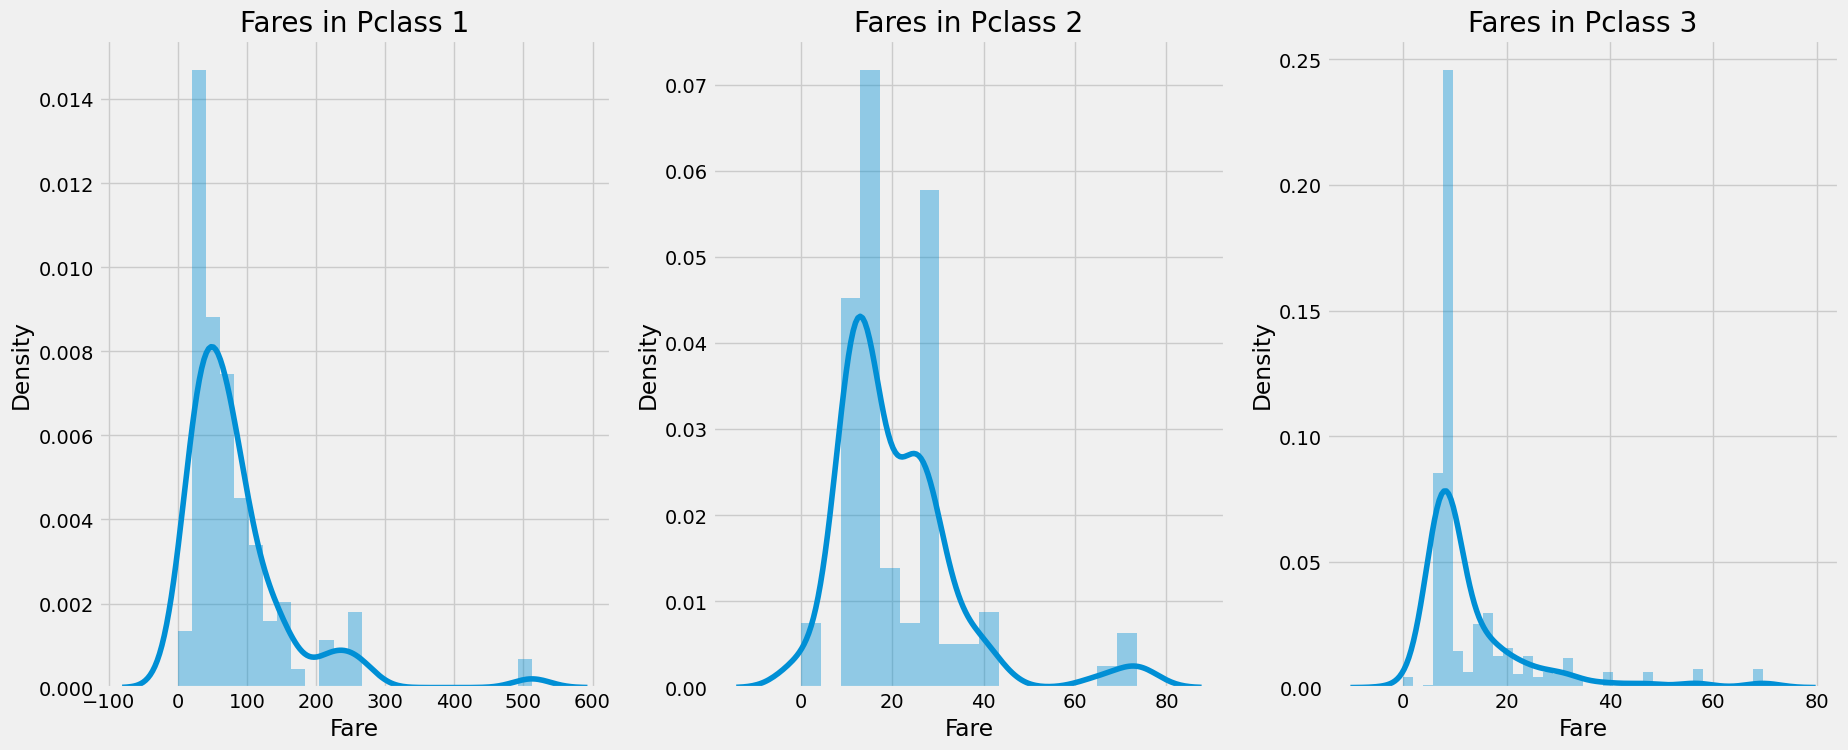

In [36]:
f,ax = plt.subplots(1,3, figsize=(20,8))

sns.distplot(data[data['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

# Correlation Between The Features

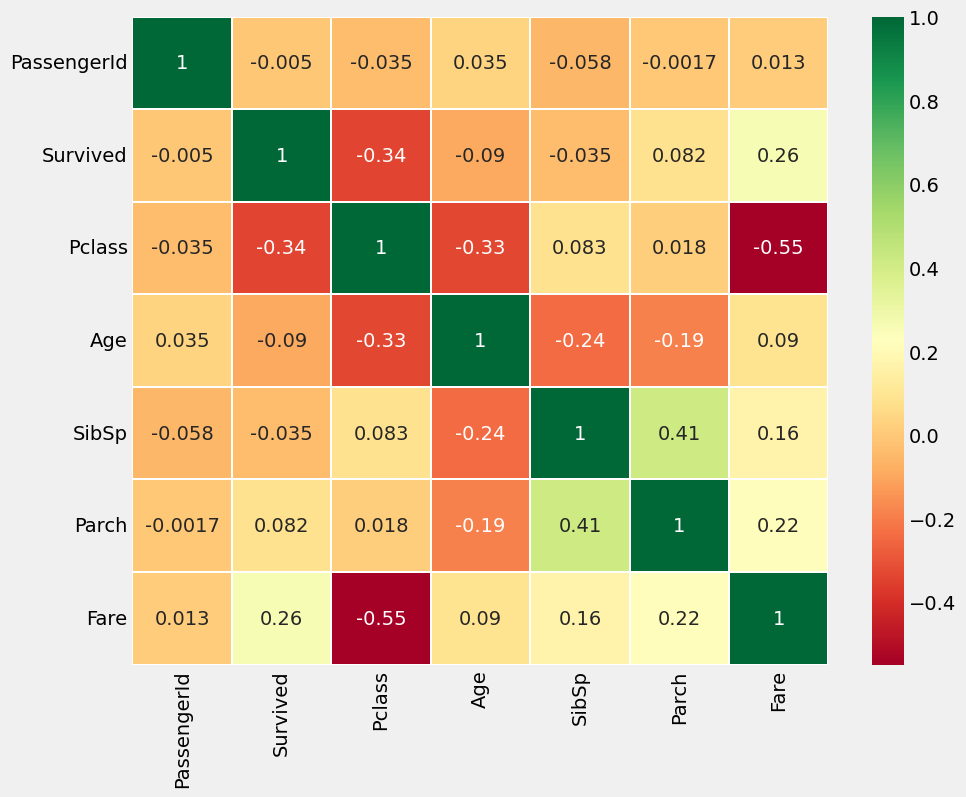

In [37]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### 히트맵 해석
- 가장 먼저 주목해야 할 것은 알파벳이나 문자열 사이의 상관 관계가 없다는 것이 명백하기 때문에 숫자형 Feature들만 비교한다는 것. 그래프를 이해하기 전에, 상관관계가 정확히 무엇인지 살펴보자

- 긍정적인 상관관계 : 만약 Feature A의 증가가 Feature B의 증가도 영향을 끼치면(이끌면), 그들은 긍정적인(양의) 상관관계가 있다는 것이다. A 값 1은 완벽한 양의 상관관계를 의미한다.

- 부정적인 상관관계 : 만약 Feature A의 증가가 Feature B의 감소로 영향을 끼치면(이끌면), 그들은 부정적인(음의) 상관관계가 있다는 것이다. A 값 -1은 완벽히 음의 상관관계를 의미한다.

- 이제 두 Feature들이 높거나 완벽하게 상관관계에 있어서 한 Feature가 증가하면 다른 Feature도 증가로 이끈다고 치자. 이것은 두 Feature 둘 다 매우 유사한 정보를 포함하고 있고 정보의 차이가 적거나 거의 없다는 것을 의미한다. 
둘 다 거의 동일한 정보를 포함하므로 이를 다중공선성이라고 합니다.

- 그래서 너는 둘 중 하나가 중복되므로 둘 다 사용해야 된다고 생각해? 모델을 훈련하고 만드는 동안, 우리는 훈련 시간을 단축하고 많은 이점을 제공하므로 중복 기능을 제거하도록 노력해야 한다.

- 이제 위의 히트맵을 보면, 우리는 Feature들이 많이 상관관계가 없다는 것을 볼 수 있다. 가장 높은 상관관계는 SibSp과 Parch .i.e 0.41 사이의 것이다. 그래서 우리는 모든 기능을 계속 사용할 것이다. (.i.e는 즉, 다시 말해를 뜻함)

# Part 2 : Feature Engineering and Data Cleaning

#### What is Feature Engineering?

- 특징들(Features)이 있는 데이터 셋을 우리가 줄때마다, 모든 특징들(Features)이 중요할 필요가 없다. 제거가 필요한 많은 필요한 특징들(Features)이 있다. 또한 우리는 다른 특징들(Features)로부터 관찰하거나 적출한 정보로 새로운 특징들(Features)을 얻거나 추가할 수 있다.
- 예로 이름 Feature를 사용해서 초성 Feature를 얻을 수 있다. 우리가 어떤 새로운 Features를 얻을 수 있는지와 몇개를 제거할 수 있는지 보자. 또한 우리는 기존에 관련있는 Features을/를 예측 모델링에 적합한 형태로 변환할 것이다.

### Age_band

- Age Feature의 문제
- 앞에서 언급했듯이 Age Features는 Continous Feature (연속형)이다, 머신 러닝 모델에 continous variables(연속형 변수)는 문제가 있다.

- E.g(에를 들어) : 만약 내가 스포츠맨들을 성별로 그룹화하거나 정리하면, 우리는 아마 쉽게 남자 와 여자로 구분할 수 있다.

- 이제 만약 내가 그들의 나이로 그들을 그룹화하면, 너는 어떻게 할 것이냐? 만약 30명의 사람들이 있다면, 나이 값은 30개가 있을 것이다. 이것은 문제가 된다.

- 우리는 이러한 연속형 값들을 구간화(Binning) 또는 Normalisation(정규화)를 통해 범주형 값으로 변환할 필요가 있다. 나는 구간화를 사용할 것이다. 즉, 다양한 연령대를 단일 구간으로 그룹화하거나 단일 값을 할당할 것이다.

- 자, 승객의 최고령은 80세이다. 그래서 0-80 범위를 5개의 bin으로 나누겠다. 80/5 = 16, bin은 16 사이즈이다.

In [38]:
# 나이의 값을 나눠서 age_band라는 변수에 그 나이가 어디에 해당하는지 범주를 나눠주는 코드
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [39]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,329
0,100
3,69
4,11


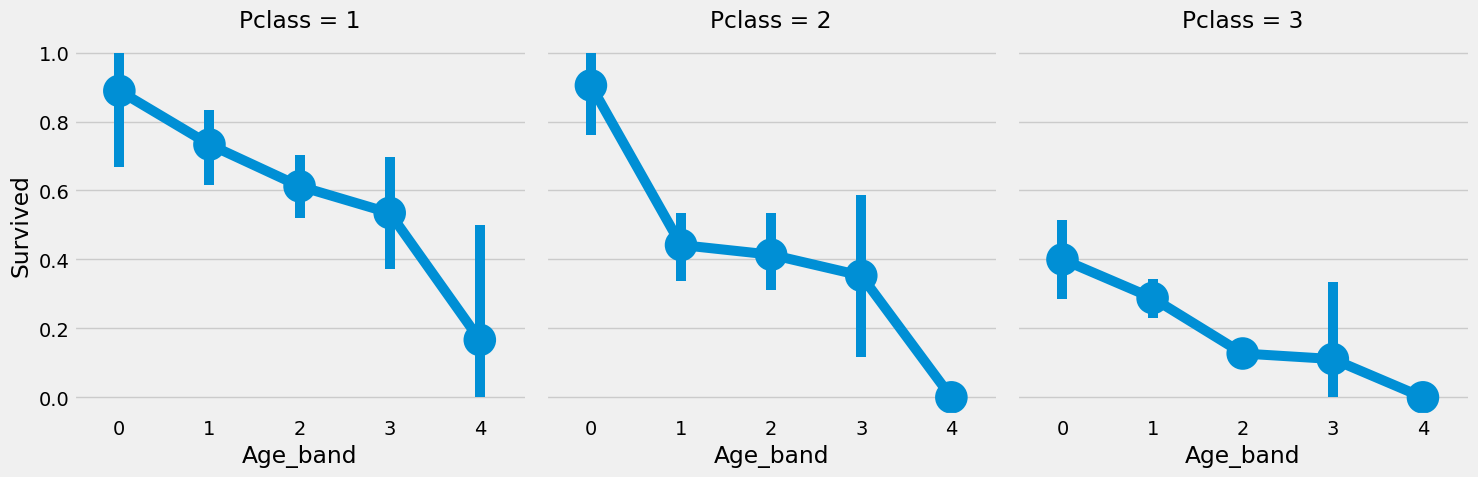

In [40]:
sns.catplot(x='Age_band', y='Survived', data=data, col = 'Pclass', kind="point")
plt.show()

age_band가 높을수록 생존율이 떨어진다.

## Family_Size and Alone
이 포인트에서, 우리는 "Family_Size"와 "Alone"이라는 새로운 특징(feature)을 만들 수 있고 그것을 분석할 수 있다. 이 피처(feature)는 Parch와 SibSp가 합친 것이다. 우리는 탑승자의 가족의 규모가 생존율과 관련이 있는지를 결합된 데이터로 부터 얻을 수 있다. Alone은 탑승자가 혼자인지 아닌지를 나타낸다.

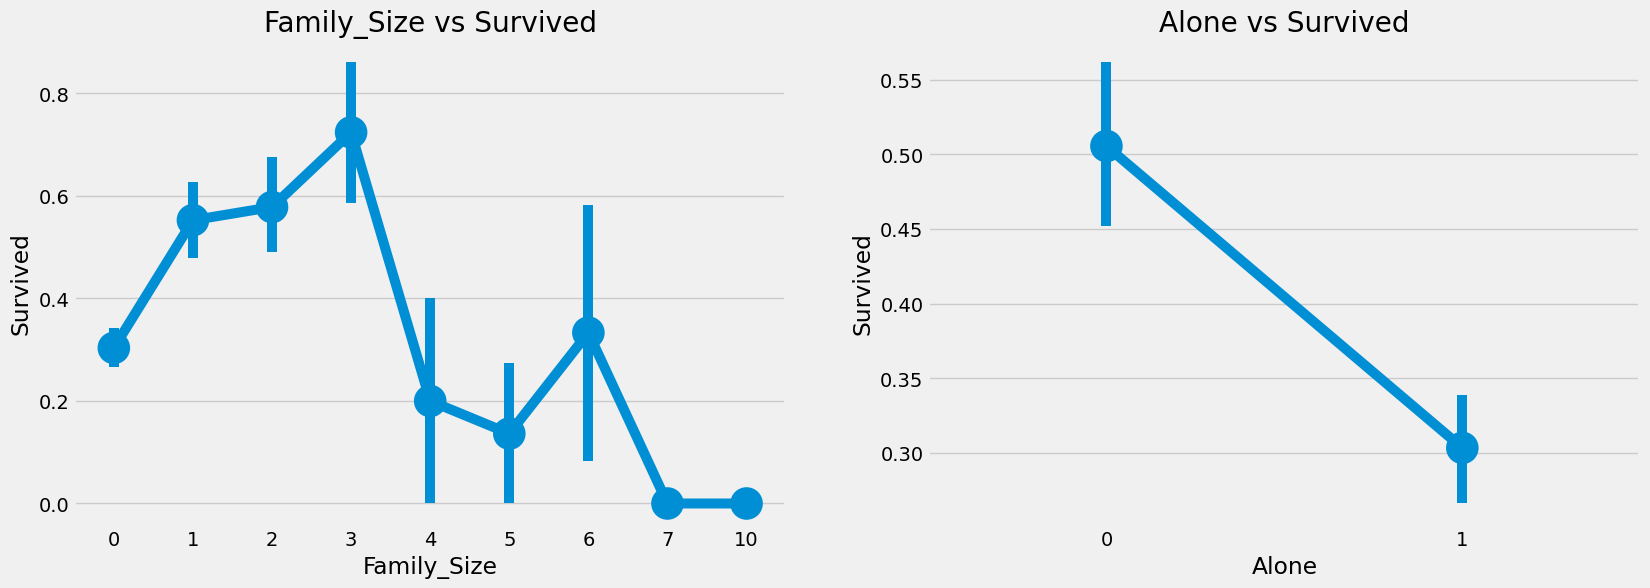

In [41]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x='Family_Size',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x="Alone",y="Survived",data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

Family_size가 0이면 그 탑승자는 혼자라는 뜻이다. 분명히, 만약 너가 혼자거나 family_size가 0이면 생존 확율이 매우 낮다. 4 이상의 family_size이면 생존 확율이 줄어든다. 이것은 모델을 위한 중요한 특징(Feature)으로 보인다. 이제 자세히 살펴보자.

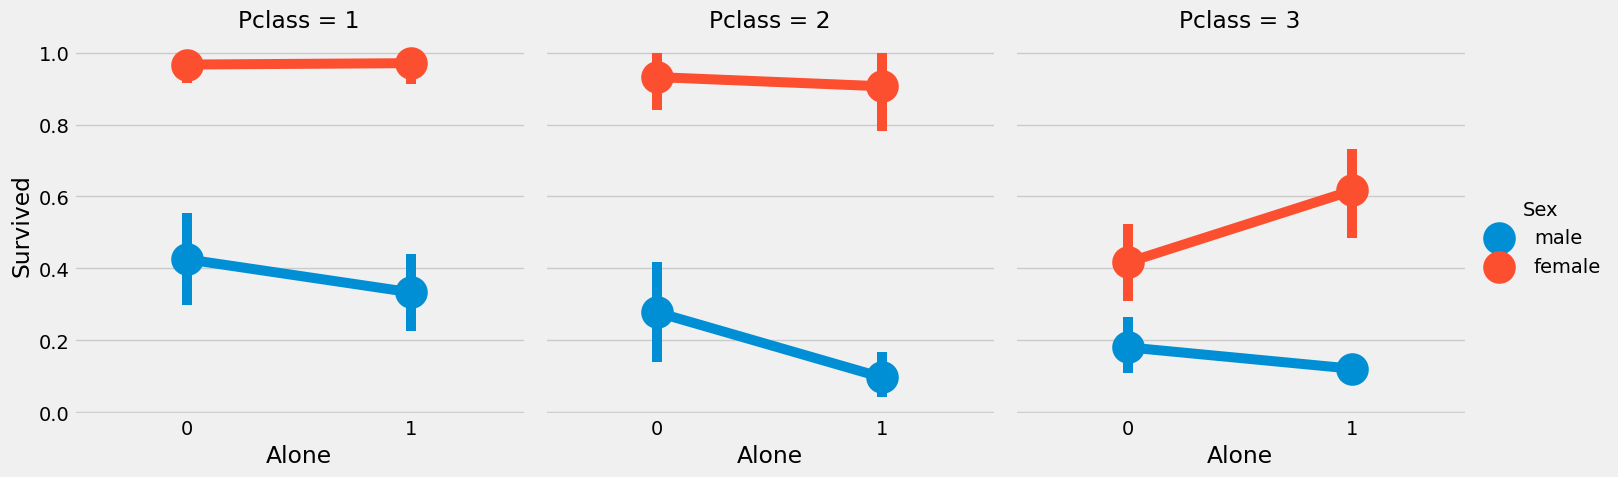

In [42]:
sns.catplot(x="Alone", y ="Survived", data=data, hue="Sex", col="Pclass", kind="point")
plt.show()

가족이 있는 여성보다 혼자 있을 확률이 높은 Pclass3를 제외하고는 성별이나 Pclass에 관계없이 혼자 있는 것이 해롭다는 것을 알 수 있다.

### Fare_Range
- 요금(fare) feature도 연속형 feature이기 때문에, 우리는 명목형 변수로 변환해줘야한다. 이것을 위해 우리는 pandas.qcut을 사용할 것이다.
- 그래서 qcut가 하는 것은 우리가 전달한 bin들의 숫자들에 대해 분할하거나 정렬한다. 그래서 만약 우리가 5개의 bin을 통과하면, 그것은 5개의 별도 bin 또는 값 범위에 동일한 간격으로 배열된다.

In [43]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- 위에서 의논한것 처럼, 우리는 명확히 fare_range가 증가할수록 생존 확률이 증가하고 있다.
- 이제 우리는 Fare_Range 값을 그대로 전달할 수 없다. 우리는 Age_band에서 했던 것 처럼 싱글톤 값으로 바꿔줘야한다.

In [44]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.45), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

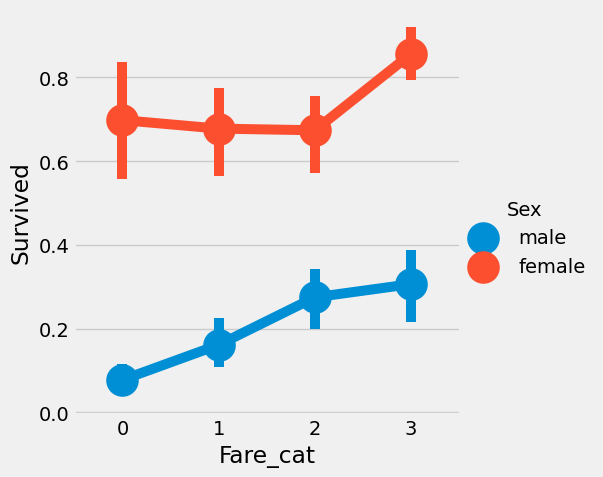

In [45]:
sns.catplot(x='Fare_cat', y='Survived', data=data, hue = 'Sex', kind="point")
plt.show()

- 명확히, Fare_cat이 증가하면, 생존 확률도 증가한다. 이 Feature는 Sex와 모델링을 하는 동안에 중요한 Feature가 될 것 같다.

### Converting String Values into Numeric
- 우리는 문자열을 머신러닝 모델에 전달 할 수 없기 때문에, 우리는 Sex, Embarked 등과 같이 숫자 값으로 feature를 변환할 필요가 있다.

In [46]:
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)

#### Dropping UnNeeded Features
- Name -> 우리는 이름 Feature를 범주형 변수로 변환할 수 없어서 필요하지 않다.
- Age -> 우리는 Age_band Feature가 있어서 이것이 필요하지 않다.
- Ticket -> 이것은 분류할 수 없는 랜덤한 문자열이다.
- Fare -> 우리는 Fare_cat Feature가 있어서 필요하지 않다.
- Cabin -> 많은 Nan 값과 또한 많은 사람들이 여러개의 cabin을 가지고 있다. 그래서 이것은 필요하지 않은 feature이다.
- Fare_Range -> 우리는 fare_cat feature가 있다.
- PassengerId -> 분류할 수 없다.

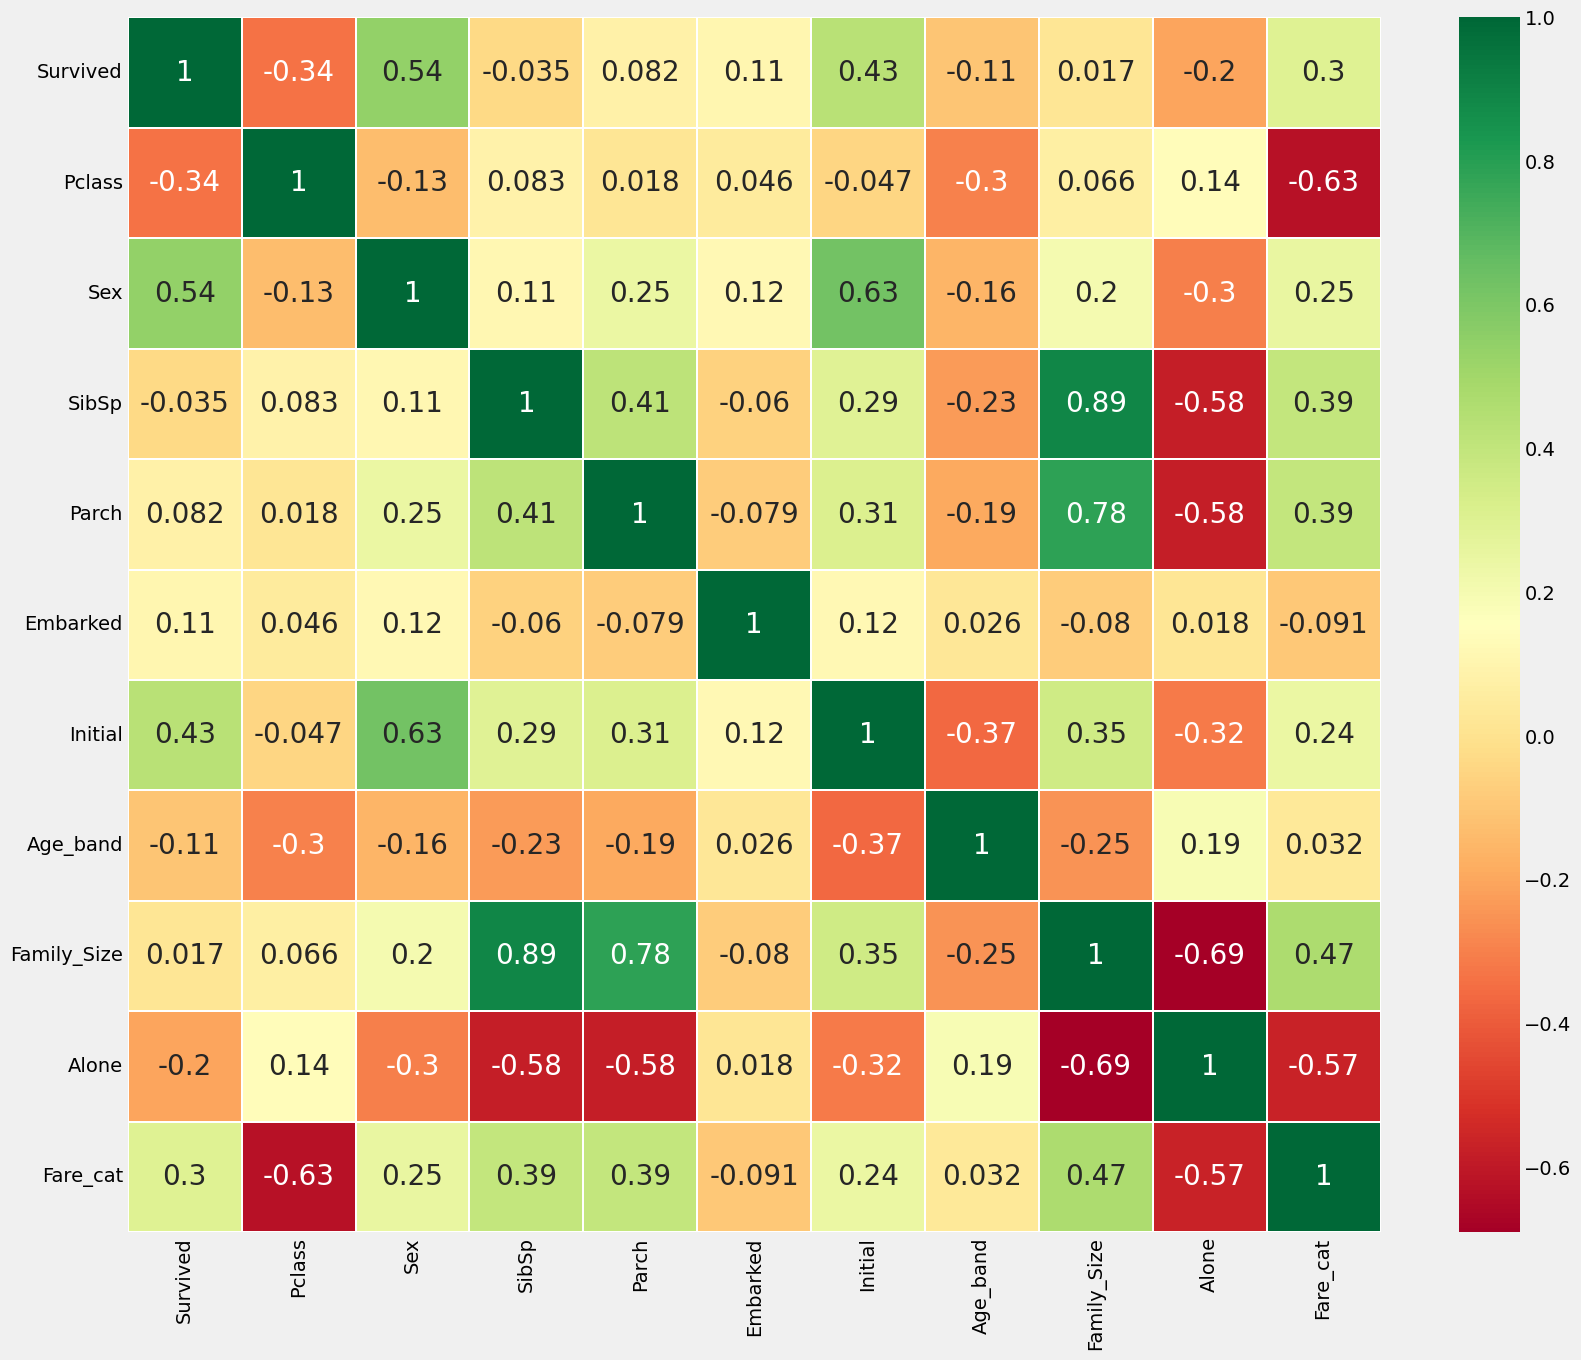

In [47]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- 위의 상관관계 그래프로 우리는 긍정적인 관계의 feature들을 볼 수 있다. 그들중에 SibSp & Family_Size와 Parch & Family_Size와 Alone & Family_Size 처럼 부정적인 것.
<br/>

# Part3 : Predictive Modeling
- 우리는 EDA 파트로부터 얻은 인사이트(insight)가 좀 있다. 그러나 그걸들로는 우리는 정확히 예측하거나 어떤 승객이 살거나 죽었을건지 말해 줄 수 없다. 그래서 이제 우리는 그 승객이 살았는지 안 그런지를 훌륭한 분류 알고리즘을 사용해서 예측할 것이다. 다음은 모델을 만드는데 사용할 알고리즘이다.
1. Logistic Regression
2. Support Vector Machines(Linear and radial)
3. Random Forest
4. knn(K-Nearest Neightbours)
5. Naive Bayes
6. Decision Tree

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [49]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

In [50]:
# Radial Support Vector Machines(rbf-SVM)
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1=model.predict(test_X)
print("Accuracy for rbf SVM is " , metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


In [51]:
# Linear Support Vector Machine(linear-SVM)
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print("Accuracy for linear SVM is ", metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.8171641791044776


In [52]:
# Logistic Regression
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print("The accuracy  of the Logistic Regression is ", metrics.accuracy_score(prediction3, test_Y))

The accuracy  of the Logistic Regression is  0.8171641791044776


In [53]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print("The accuracy of the Decision Tree is ", metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is  0.8059701492537313


In [54]:
# K-Nearest Neighbours(KNN)
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print("The accracy of the KNN is ", metrics.accuracy_score(prediction5, test_Y))

The accracy of the KNN is  0.8134328358208955


- 이제 n_neighbours 속성 값을 변경하면 KNN 모델의 정확도가 변경된다. 기본값은 5이다. n_neighbours의 다양한 값에 대한 정확도를 확인해보자.

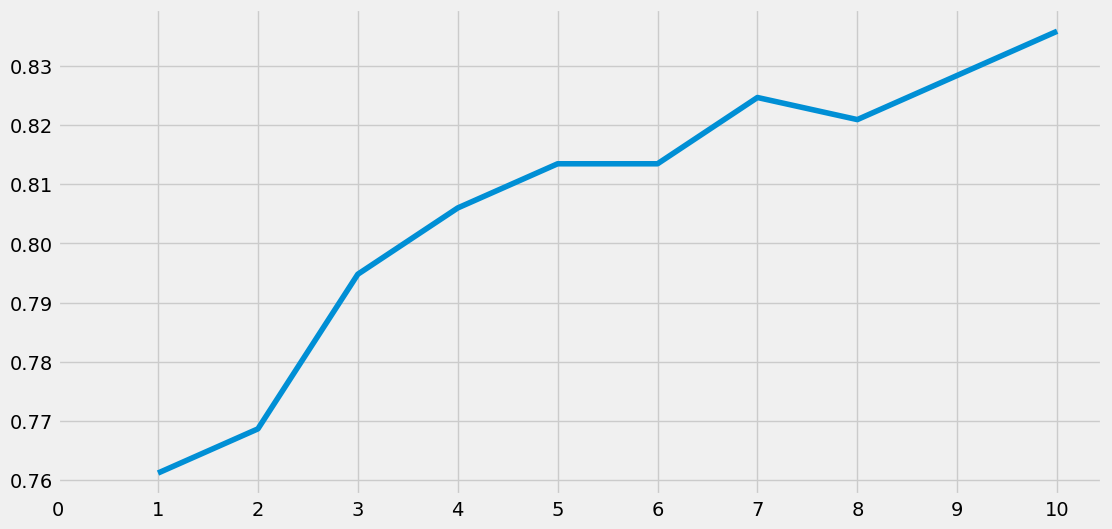

Accuracies for different values of n are:  [0.76119403 0.76865672 0.79477612 0.80597015 0.81343284 0.81343284
 0.82462687 0.82089552 0.82835821 0.8358209 ] with the max value as  0.835820895522388


In [55]:
a_index = list(range(1,11))
a=pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediciton=model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediciton, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print("Accuracies for different values of n are: ", a.values, 'with the max value as ', a.values.max())

In [56]:
# Gaussian Naive Bayes
model = GaussianNB()
model.fit(train_X, train_Y)
prediciton6 = model.predict(test_X)
print("The accuracy of the NaiveBayes is ", metrics.accuracy_score(prediciton6, test_Y))

The accuracy of the NaiveBayes is  0.8134328358208955


In [57]:
# Random Forests
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediciton7 = model.predict(test_X)
print("The accuracy of the Random Forests is ", metrics.accuracy_score(prediciton7, test_Y))

The accuracy of the Random Forests is  0.8059701492537313


- 모델의 정확도가 분류기의 견고성을 결정하는 유일한 요소는 아니다. 분류기가 훈련 데이터에 훈련되고 테스트 데이터에 테스트 되었고 정확도가 90%라고 해보자.
- 이제 이것은 분류자에 있어서 매우 좋은 정확도인 것처럼 보이지만 앞으로 나오는 모든 새로운 테스트 세트에 대해 90%가 될 것이라고 할 수 있을까?
- 답은 No이다. 왜냐하면 분류기가 자체 학습에 사용할 모든 인스턴스를 결정할 수 없기 때문입니다. 트레이닝 데이터와 테스팅 데이터가 바뀌면, 정확도 또한 바뀐다. 그것은 증가하든가 감소한다. 이것을 모델의 분산(model variance)라고 한다.
- 이것을 극복하고 일반화된 모델을 얻기 위해 우리는 교차 검증을 사용한다.

## Cross Validation
- 많은 경우 데이터가 불균형하다. 즉, class1 인스턴스의 수가 많지만 다른 클래스 인스턴스의 수가 적을 수 있다. 그러므로 우리는 데이터 세트의 모든 인스턴스에 대해 알고리즘을 훈련하고 테스트해야 한다. 그런 다음 데이터 세트에 대해 알려진 모든 정확도의 평균을 구할 수 있다.
1) K-Fold Cross Validation은 먼저 데이터 세트를 k-하위 집합으로 나누는 방식으로 작동한다. 
2) 데이터 세트를 (k=5) 파트로 나눈다고 해보자. 우리는 1개의 파트를 테스트용으로 예약하고 4개 부분에 대해 알고리즘 훈련한다.
3) 우리는 각 반복에서 테스트 부분을 변경하고 다른 부분에 대해 알고리즘을 교육하여 프로세스를 계속한다. 그런 다음 정확도와 오류를 평균하여 알고리즘의 평균 정확도를 얻는다.
이것을 K-Fold Cross Validation이라고 부른다.
4) 알고리즘은 일부 교육 데이터의 데이터세트에 비해 과소적합될 수 있으며 때로는 다른 교육 세트의 데이터에 과대적합될 수도 있다. 따라서 교차 검증을 통해 일반화된 모델을 얻을 수 있다.

## 추가 정보)
- https://velog.io/@sty0507/교차-검증-Cross-Validation

In [58]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.785730,0.059693
Radial Svm,0.828377,0.057096
Logistic Regression,0.798077,0.043146
KNN,0.812634,0.041063
Decision Tree,0.798002,0.043972
Naive Bayes,0.794719,0.055611
Random Forest,0.809251,0.045527


<Axes: >

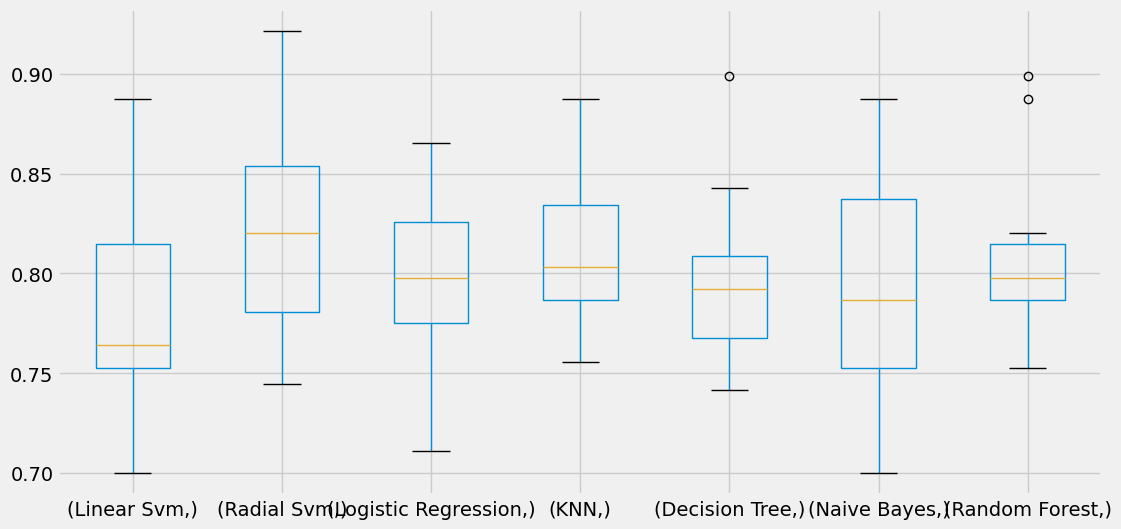

In [59]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

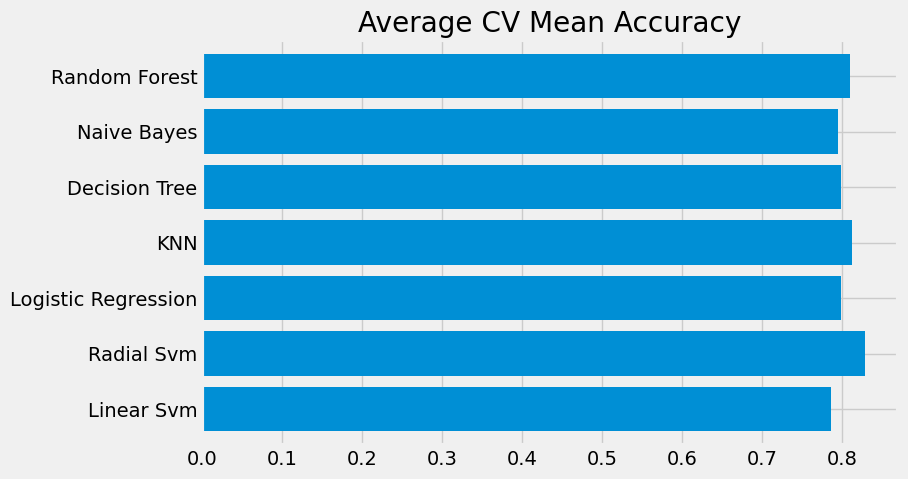

In [60]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

- 분류 정확도는 때때로 불균형 때문에 오해의 소지가 있다. 우리는 모델이 어디에서 잘못되었는지 또는 모델이 어떤 클래스를 잘못 예측했는지 보여주는 혼동 행렬의 도움으로 요약된 결과를 얻을 수 있다.

## Confusion Matrix
- 분류자가 수행한 올바른 분류와 잘못된 분류의 수를 제공합니다.

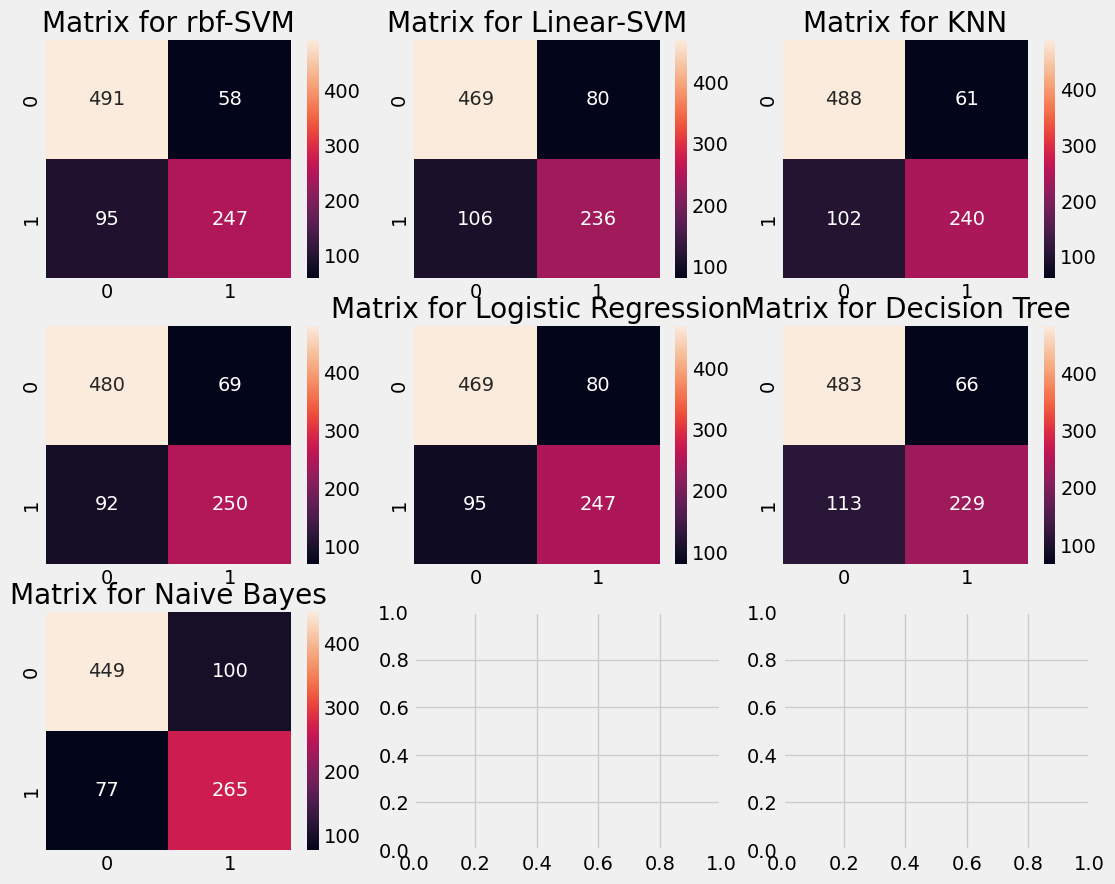

In [61]:
f, ax = plt.subplots(3,3, figsize=(12, 10))
y_prod = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_prod), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X,Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

### Interpreting Confusion Matrix
- 왼쪽 대각선은 각 클래스에 대한 올바른 예측 수를 나타내고 오른쪽 대각선은 잘못된 예측 수를 나타낸다. rbf-SVM에 대한 첫 번째 플롯을 고려해 보자.

1) 올바른 예측의 비율은 491(죽은 경우) + 247(생존한 경우)이며 평균 CV 정확도는 (491+247)/891 = 82.8%로 이전에 얻은 것이다.

2) 오류--> 사망자가 58명이 생존자로 잘못 분류되었고, 95명이 사망으로 생존했다. 따라서 죽은 것을 살아남은 것으로 예측함으로써 더 많은 실수를 만들었다.

- 모든 행렬을 살펴보면 rbf-SVM이 죽은 승객을 정확하게 예측할 확률이 더 높지만 NaiveBayes는 살아남은 승객을 정확하게 예측할 확률이 더 높다고 할 수 있다.

### Hyper-Parameters Tuning
- 머신러닝 모델은 블랙박스와 같다. 이 블랙박스에는 몇 가지 기본 매개변수 값이 있으며, 더 나은 모델을 얻기 위해 이를 조정하거나 변경할 수 있다. SVM 모델의 C 및 감마 및 다양한 분류기에 대한 유사하게 다른 매개변수를 하이퍼 매개변수라고 하며, 이를 조정하여 알고리즘의 학습 속도를 변경하고 더 나은 모델을 얻을 수 있다. 이를 하이퍼 매개변수 조정이라고 한다.

- 우리는 SVM과 RandomForests라는 최고의 분류기 2개에 대한 하이퍼 매개변수를 조정할 것이다.

In [62]:
# SVM
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel' : kernel, 'C' : C, 'gamma' : gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [63]:
# Random Forest
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators' : n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8215742891218379
RandomForestClassifier(n_estimators=400, random_state=0)


- Rbf-Svm에 대한 최고 점수는 C=0.05 및 감마=0.1에서 82.82%이다. RandomForest의 경우 n_estimators=900에서 점수는 약 81.8%이다.
## Ensembling
- Ensembling(앙상블)은 모델의 정확도를 높이는데 좋은 방법이다. 간단히 말해서, 다양한 단순 모델을 조합하여 하나의 강력한 모델을 만드는 것이다.
- 우리가 전화기를 구입하고 다양한 매개변수를 기반으로 많은 사람들에게 전화기에 대해 물어보고 싶다고 가정해보자. 그러면 우리는 모두 다른 매개변수들을 분석한 후에 단일 제품에 대한 강력한 판단을 내릴 수 있다. 이것이 모델의 안정성을 높여주는 Ensembling(앙상블)이다. Ensembling은 다음과 같이 수행될 수 있다:
1) Voting Classifier
2) Bagging
3) Boosting
<br>

#### Voting Classifier
- 이는 다양하고 간단한 머신러닝 모델의 예측을 결합하는 가장 간단한 방법이다. 모든 서브 모델들의 예측들을 기반으로 한 평균 예측 결과를 준다. 서브 모델 또는 베이스 모델들은 모두 다른 형태이다.

In [64]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)), 
                                                ('RBF', svm.SVC(probability=True, kernel='rbf', C = 0.5, gamma=0.1)),
                                                ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                                ('LR', LogisticRegression(C=0.05)),
                                                ('DT', DecisionTreeClassifier(random_state=0)),
                                                ('NB', GaussianNB()),
                                                ('svm', svm.SVC(kernel='linear', probability=True))], 
                                                voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is : ', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring="accuracy")
print("The cross validated score is ", cross.mean())


The accuracy for ensembled model is :  0.8208955223880597
The cross validated score is  0.8215480649188514


#### Bagging
- Bagging은 일반적인 Ensemble 메서드이다. 이는 데이터 세트의 작은 파티션에 유사한 분류기를 적용한 다음 모든 예측의 평균을 취하는 방식으로 작동한다. 평균화로 인해 분산이 감소한다. 투표 분류기와 달리 배깅은 유사한 분류기를 사용한다.
#### Bagged KNN
- Bagging은 분산이 높은 모델에서 가장 잘 작동한다. 이것의 예는 Decision Tree 또는 Random Forests가 될 수 있다. 우리는 n_neighbours의 작은 값으로 KNN을 작은 값 n_neighbours로 사용할 수 있다.

In [65]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8137952559300874


In [66]:
# Bagged DecisionTree
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=1000)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print("The accuracy for bagged Decision Tree is : ", metrics.accuracy_score(prediciton, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is : ', result.mean())

The accuracy for bagged Decision Tree is :  0.835820895522388
The cross validated score for bagged Decision Tree is :  0.8182646691635455


#### Boosting
- Boosting은 분류기의 순차적 학습을 사용하는 ensembling 기술이다. 이는 약한 모델을 단계별로 향상시키는 것이다. 부스팅은 다음과 같이 작동한다 :

- 모델은 전체 데이터셋에서 처음 학습된다. 이제 모델은 일부 인스턴스는 옳은 반면에 일부는 잘못된 것을 얻게 될 것이다. 이제 다음 반복에서, 학습자는 잘못 예측된 인스턴스에 더 집중하거나 그것에 가중치를 좀 더 둘 것이다. 그러므로 그것은 잘못된 인스턴스를 정확하게 예측하도록 시도할 것이다. 이제 이 반복 프로세스는 계속 진행되며 정확도 한계에 도달할 때까지 새로운 분류기가 모델에 추가된다.

#### AdaBoost(Adaptive Boosting)
- 이 경우 약한 학습기 또는 추정기는 Decsion Tree이다. 그러나 우리는 base_estimator을 우리가 선택한 아무 알고리즘으로 바꿀 수 있다.

In [67]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X,Y,cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is : ', result.mean())

The cross validated score for AdaBoost is :  0.8249188514357055


In [68]:
# Stochastic Gradient Boosting
# 여기 약한 학습자는 Decision Tree이다.
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X,Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is : ', result.mean())

The cross validated score for Gradient Boosting is :  0.8115355805243445


In [79]:
pip install xgboost


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [80]:
# XGBoost
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost,X,Y,cv=10, scoring='accuracy')
print('The cross validated score for XdGBoost is : ', result.mean())

The cross validated score for XdGBoost is :  0.8115230961298376


In [81]:
# 우리는 AdaBoost의 최고 정확도를 얻었다. 우리는 Hyper-Parameter Tuning으로 그것을 증가 시켜 볼 것이다.
# Hyper-Parameter Tuning for AdaBoost
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators' : n_estimators, 'learning_rate' : learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.824913690289373
AdaBoostClassifier(learning_rate=0.05, n_estimators=400)


- AdaBoost로 우리가 얻을 수 있는 최고 정확도 같은 n_estimator= 400이고 learning_rate = 0.05인 82.5%이다.

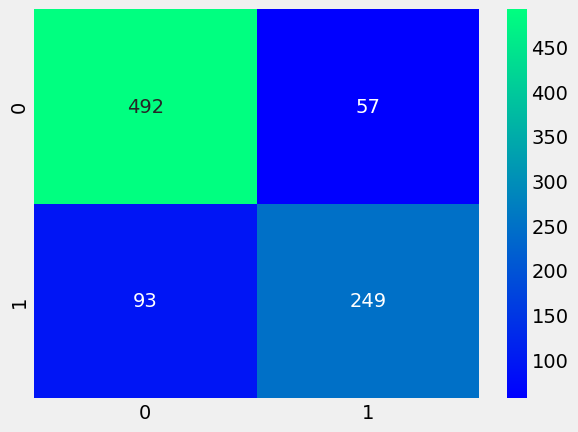

In [82]:
# Confusion Matrix for the Best Model
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

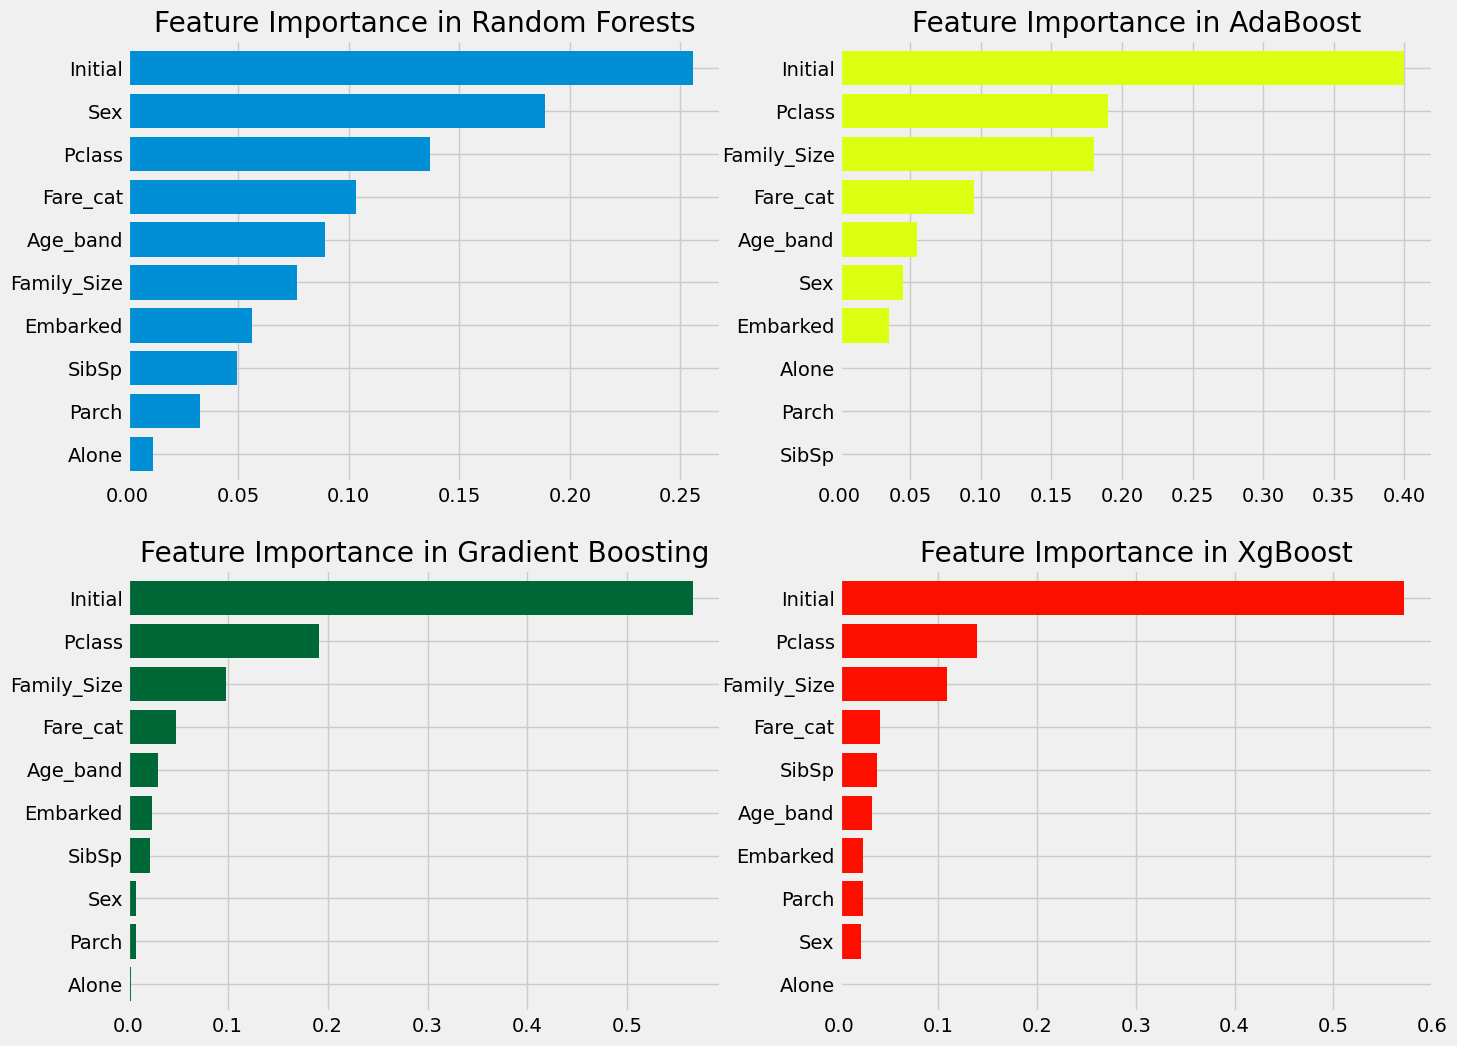

In [85]:
f, ax = plt.subplots(2,2,figsize=(15,12))
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learn_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

- 우리는 RandomForests, AdaBoost 등과 같은 다양한 분류기의 중요한 기능을 볼 수 있다.

#### 관찰
1) 공통적으로 중요한 feature는 Initial, Fare_cat, Pclass, Family_Size이다.
2) Sex feature는 아무런 중요성을 주지 않는다, 이는 이전에 Pclass와 결합된 Sex가 매우 좋은 차별화 요소를 제공했다는 점을 본 것처럼 충격적이다. Sex는 RandomForests에서 오직 중요해 보인다.
하지만, 우리는 많은 분류기에서 상위권(top)에 있는 Initial feature를 볼 수 있다. 우리는 이미 Sex와 Initial 사이의 긍정적인 상관관계를 확인했으므로 둘 다 성별을 나타낸다.
3) 마찬가지로 Pclass 및 Fare_cat은 Alone, Parch 및 SibSp를 사용하여 승객 및 Family_Size의 상태를 나타낸다.
